**Loading Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


In [ ]:
!ls

 archive   best_model.h5  'google plant photos'


**Preprocessing the data**

In [ ]:
from keras_preprocessing import image
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import keras
from tensorflow.keras.utils import img_to_array,load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions

In [ ]:
len(os.listdir('/content/drive/MyDrive/kaggle/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'))

38

In [ ]:
train_datagen=ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function=preprocess_input)
val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train=train_datagen.flow_from_directory(directory='/content/drive/MyDrive/kaggle/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',target_size=(256,256),batch_size=38)




Found 5700 images belonging to 38 classes.


In [ ]:
val=val_datagen.flow_from_directory(directory='/content/drive/MyDrive/kaggle/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',target_size=(256,256),batch_size=38)

Found 4749 images belonging to 38 classes.


**Building The CNN Model**

In [ ]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model=VGG19(input_shape=(256,256,3),include_top=False)

80134624/80134624 [==============================] - 6s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable=False


In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
x=Flatten()(base_model.output)
x=Dense(units=38,activation='softmax')(x)

#creating our model
model=Model(base_model.input,x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

**Model Compilation**

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

**Early Stopping And Model Checkpoint**


In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
#early stopping
es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1)
# model check point
mc=ModelCheckpoint(filepath='best_model.h5',
                   monitor='val_accuracy',
                   min_delta=0.01,
                   verbose=1,
                   save_best_only=True)
cb=[es,mc]

In [ ]:
his=model.fit_generator(train,
                        steps_per_epoch=16,
                        epochs=50,
                        verbose=1,
                        callbacks=cb,
                        validation_data=val,
                        validation_steps=16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 23.9027 - accuracy: 0.2089 
Epoch 1: val_accuracy improved from -inf to 0.47204, saving model to best_model.h5
16/16 [==============================] - 1021s 65s/step - loss: 23.9027 - accuracy: 0.2089 - val_loss: 12.1558 - val_accuracy: 0.4720
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 13.7875 - accuracy: 0.4638 
Epoch 2: val_accuracy improved from 0.47204 to 0.59046, saving model to best_model.h5
16/16 [==============================] - 887s 57s/step - loss: 13.7875 - accuracy: 0.4638 - val_loss: 10.3271 - val_accuracy: 0.5905
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 9.7521 - accuracy: 0.5806 
Epoch 3: val_accuracy improved from 0.59046 to 0.66612, saving model to best_model.h5
16/16 [==============================] - 778s 50s/step - loss: 9.7521 - accuracy: 0.5806 - val_loss: 7.0323 - val_accuracy: 0.6661
Epoch 4/50
16/16 [==============================] - ETA: 0s 

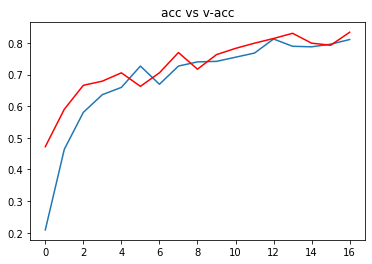

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c='red')
plt.title('acc vs v-acc')
plt.show()

In [ ]:
# load best model

from keras.models import load_model
model=load_model("/content/drive/MyDrive/kaggle/best_model.h5")

In [ ]:
acc=model.evaluate_generator(val)[1]

print(f"the accuracy of your model is ={acc*100}%")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


the accuracy of your model is =82.14361071586609%


In [ ]:
train.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

**Prediction**

In [ ]:
ref=dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

In [ ]:
def prediction(path):
  img=load_img(path,target_size=(256,256))
  i=img_to_array(img)
  im=preprocess_input(i)
  img=np.expand_dims(im,axis=0)
  pred=np.argmax(model.predict(img))
  print(pred)
  print(f" the image belongs to  { ref[pred]  }")


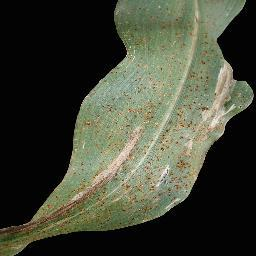

1/1 [==============================] - 7s 7s/step
8
 the image belongs to  Corn_(maize)___Common_rust_


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
#Import image
image = cv2.imread(r'/content/drive/MyDrive/kaggle/archive/test/test/CornCommonRust1.JPG')
#display the image
cv2_imshow(image)
#print(image)
path='/content/drive/MyDrive/kaggle/archive/test/test/CornCommonRust1.JPG'
prediction(path)


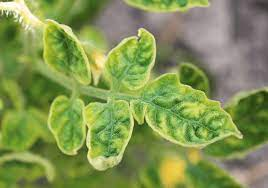

1/1 [==============================] - 0s 20ms/step
35
 the image belongs to  Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
#Import image
image = cv2.imread(r'/content/drive/MyDrive/kaggle/google plant photos/tomato_yellow_curl.jfif')
#display the image
cv2_imshow(image)
#print(image)
path='/content/drive/MyDrive/kaggle/google plant photos/tomato_yellow_curl.jfif'
prediction(path)

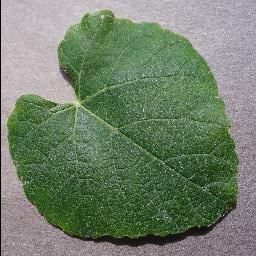

1/1 [==============================] - 0s 20ms/step
14
 the image belongs to  Grape___healthy


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
#Import image
image = cv2.imread(r'/content/drive/MyDrive/kaggle/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___healthy/0ac4ff49-7fbf-4644-98a4-4dc596e2fa87___Mt.N.V_HL 9004_270deg.JPG')
#display the image
cv2_imshow(image)
#print(image)
path='/content/drive/MyDrive/kaggle/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___healthy/0ac4ff49-7fbf-4644-98a4-4dc596e2fa87___Mt.N.V_HL 9004_270deg.JPG'
prediction(path)

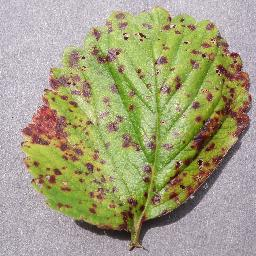

1/1 [==============================] - 0s 19ms/step
26
 the image belongs to  Strawberry___Leaf_scorch


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
#Import image
image = cv2.imread(r'/content/drive/MyDrive/kaggle/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Strawberry___Leaf_scorch/0be84fb6-08e5-40a0-af47-b576e92c12f8___RS_L.Scorch 1001_flipLR.JPG')
#display the image
cv2_imshow(image)
#print(image)
path='/content/drive/MyDrive/kaggle/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Strawberry___Leaf_scorch/0be84fb6-08e5-40a0-af47-b576e92c12f8___RS_L.Scorch 1001_flipLR.JPG'
prediction(path)

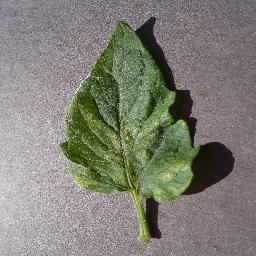

1/1 [==============================] - 0s 16ms/step
33
 the image belongs to  Tomato___Spider_mites Two-spotted_spider_mite


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
#Import image
image = cv2.imread(r'/content/drive/MyDrive/kaggle/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite/00fa99e8-2605-4d72-be69-98277587d84b___Com.G_SpM_FL 1453.JPG')
#display the image
cv2_imshow(image)
#print(image)
path='/content/drive/MyDrive/kaggle/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite/00fa99e8-2605-4d72-be69-98277587d84b___Com.G_SpM_FL 1453.JPG'
prediction(path)

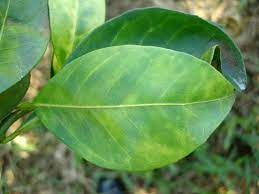

1/1 [==============================] - 0s 24ms/step
15
 the image belongs to  Orange___Haunglongbing_(Citrus_greening)


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
#Import image
image = cv2.imread(r'/content/drive/MyDrive/kaggle/google plant photos/orange haunglongbing leaf.jfif')
#display the image
cv2_imshow(image)
#print(image)
path='/content/drive/MyDrive/kaggle/google plant photos/orange haunglongbing leaf.jfif'
prediction(path)

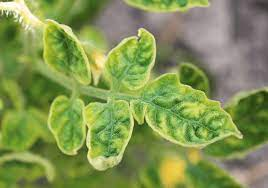

1/1 [==============================] - 0s 19ms/step
35
 the image belongs to  Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
#Import image
image = cv2.imread(r'/content/drive/MyDrive/kaggle/google plant photos/tomato_yellow_curl.jfif')
#display the image
cv2_imshow(image)
#print(image)
path='/content/drive/MyDrive/kaggle/google plant photos/tomato_yellow_curl.jfif'
prediction(path)

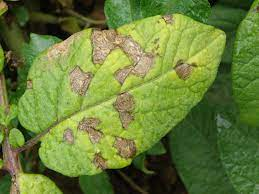

1/1 [==============================] - 0s 18ms/step
20
 the image belongs to  Potato___Early_blight


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
#Import image
image = cv2.imread(r'/content/drive/MyDrive/kaggle/google plant photos/potato_early.jfif')
#display the image
cv2_imshow(image)
#print(image)
path='/content/drive/MyDrive/kaggle/google plant photos/potato_early.jfif'
prediction(path)

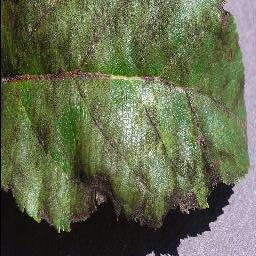

1/1 [==============================] - 0s 16ms/step
0
 the image belongs to  Apple___Apple_scab


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
#Import image
image = cv2.imread(r'/content/drive/MyDrive/kaggle/archive/test/test/test2AppleScab.JPG')
#display the image
cv2_imshow(image)
#print(image)
path='/content/drive/MyDrive/kaggle/archive/test/test/test3AppleScab.JPG'
prediction(path)

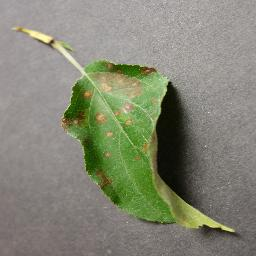

1/1 [==============================] - 0s 17ms/step
2
 the image belongs to  Apple___Cedar_apple_rust


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
#Import image
image = cv2.imread(r'/content/drive/MyDrive/kaggle/archive/test/test/tets2AppleCedarRust.JPG')
#display the image
cv2_imshow(image)
#print(image)
path='/content/drive/MyDrive/kaggle/archive/test/test/tets2AppleCedarRust.JPG'
prediction(path)